Normalized Data:
      score   reviews  km_from_center  price_per_night
0  0.511111  0.110530        0.467811         0.029160
1  0.622222  0.613816        0.008584         0.188906
2  0.377778  0.002683        0.141631         0.215531
3  0.588889  0.030762        0.407725         0.314422
4  0.633333  0.028661        0.433476         0.314422
Index(['name', 'score', 'reviews', 'room_type', 'bed_type', 'price',
       'availability', 'los', 'url', 'star_rating', 'location_rating',
       'Snapshot', 'Free_cancellation', 'No_prepayment', 'Limited_rooms',
       'TTT', 'Breakfast', 'index', 'neighborhood', 'km_from_center',
       'price_per_night', 'room_rate', 'neighborhood_category', 'checkin',
       'checkout', 'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkout_day_name_

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


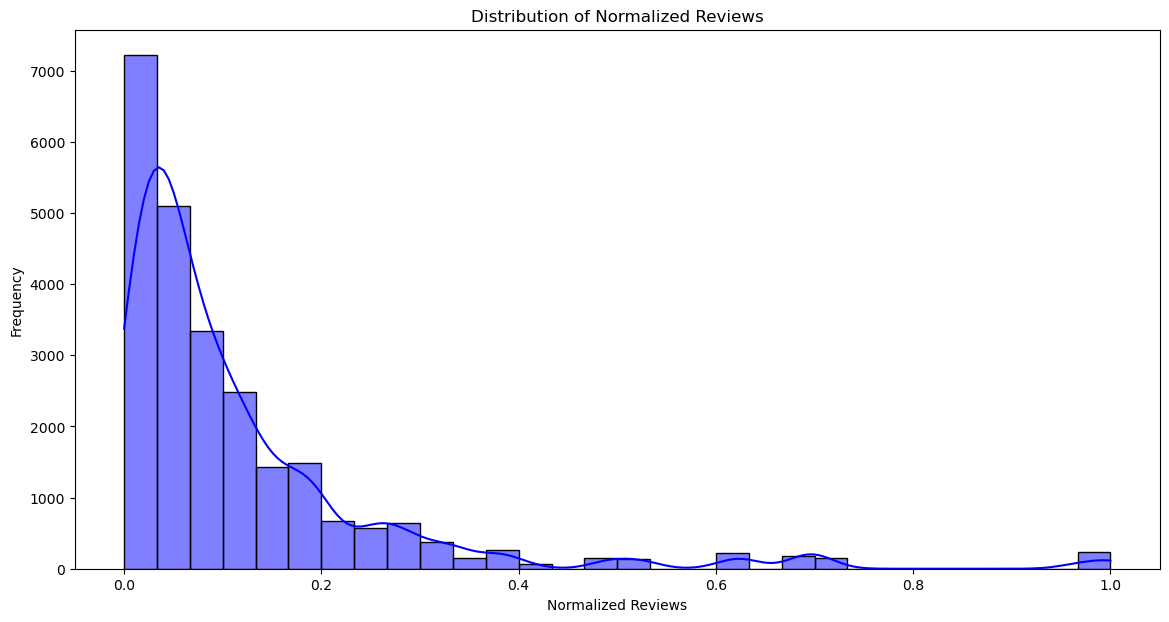

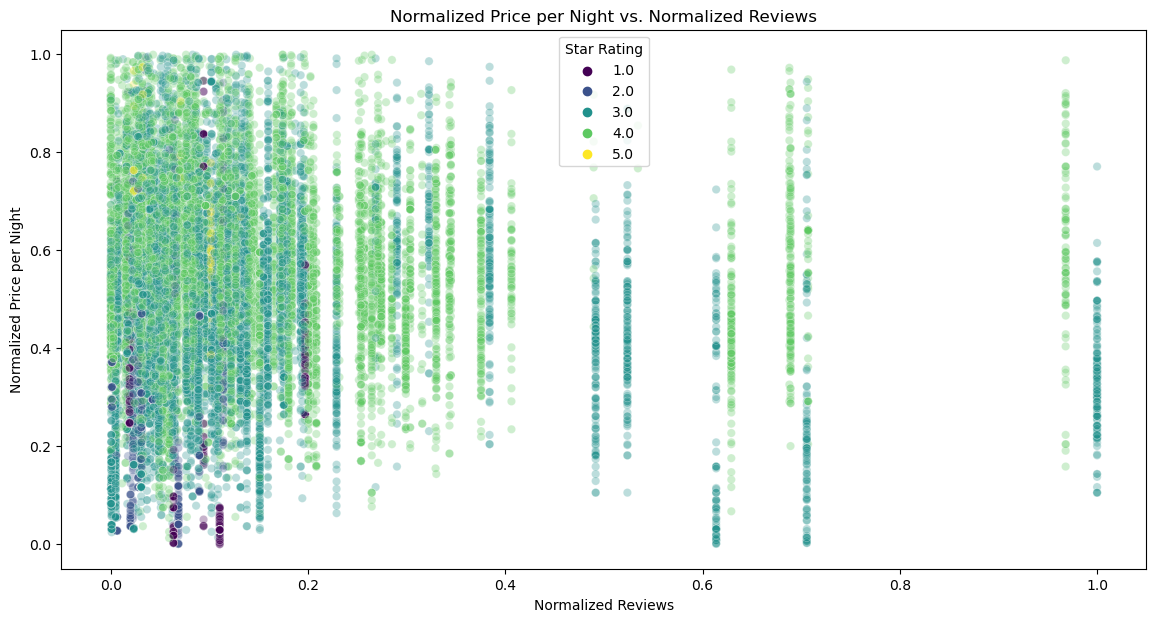

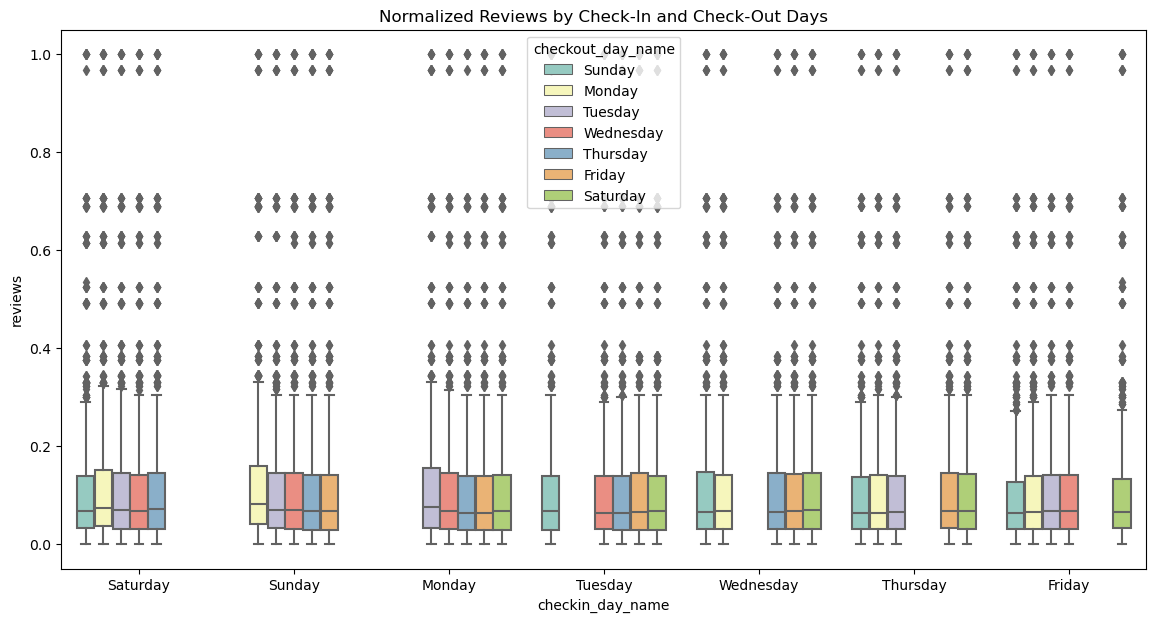

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


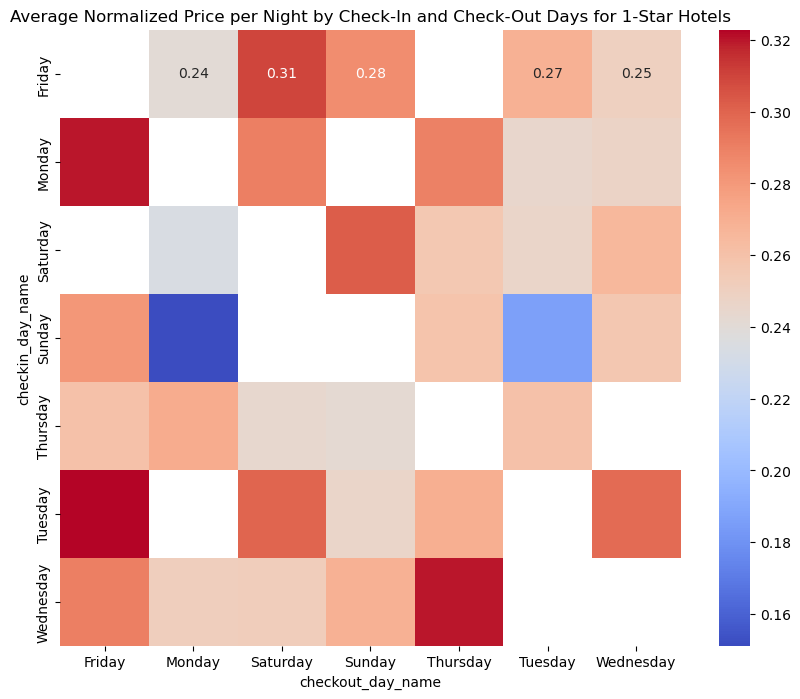

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


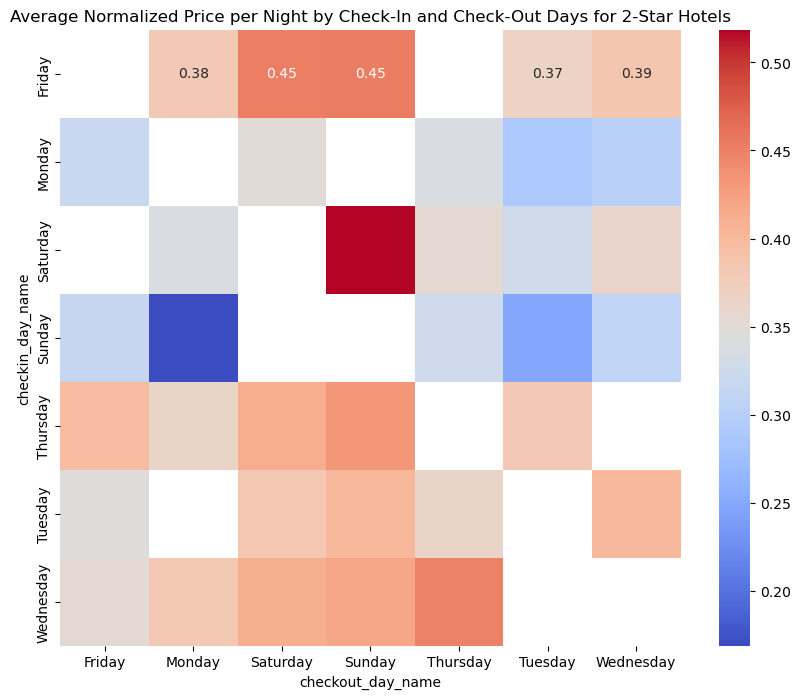

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


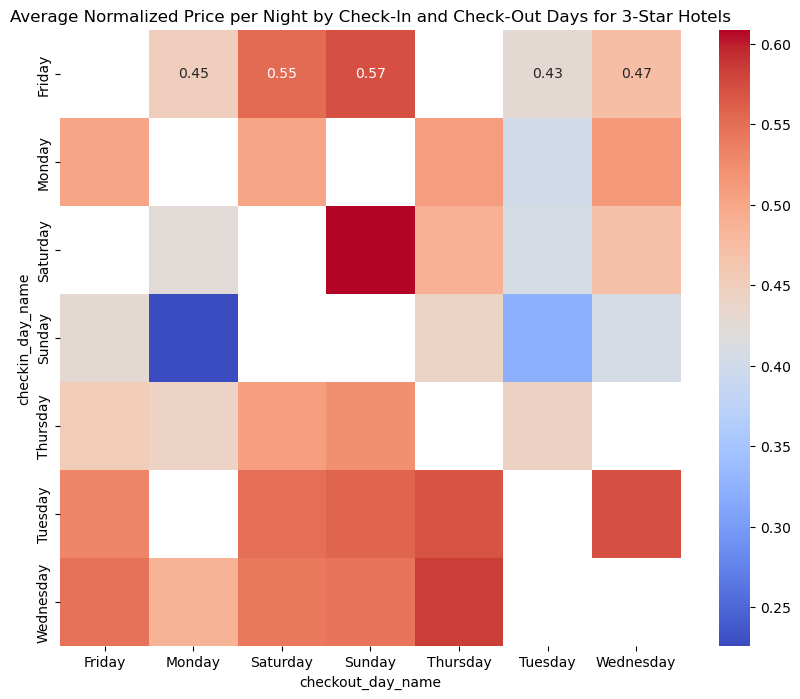

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


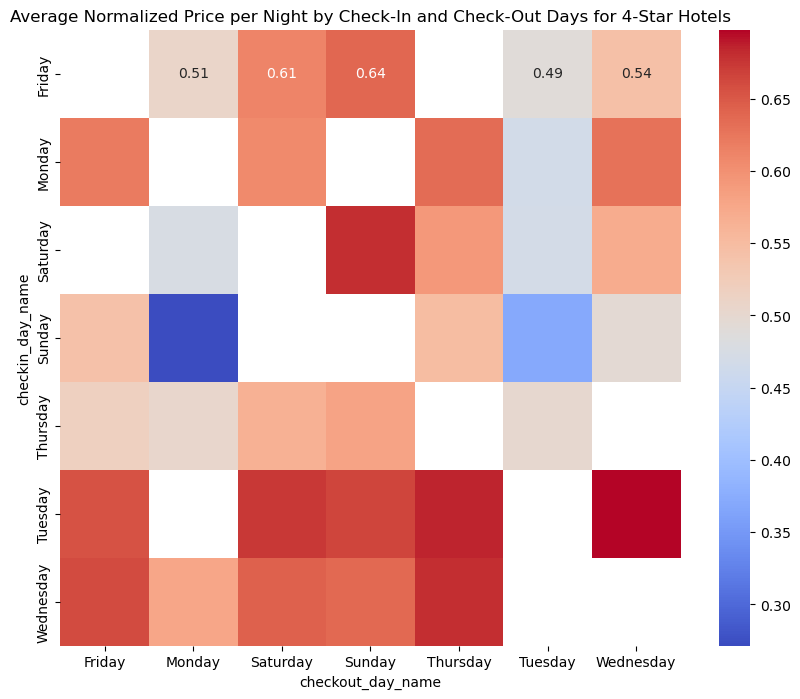

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


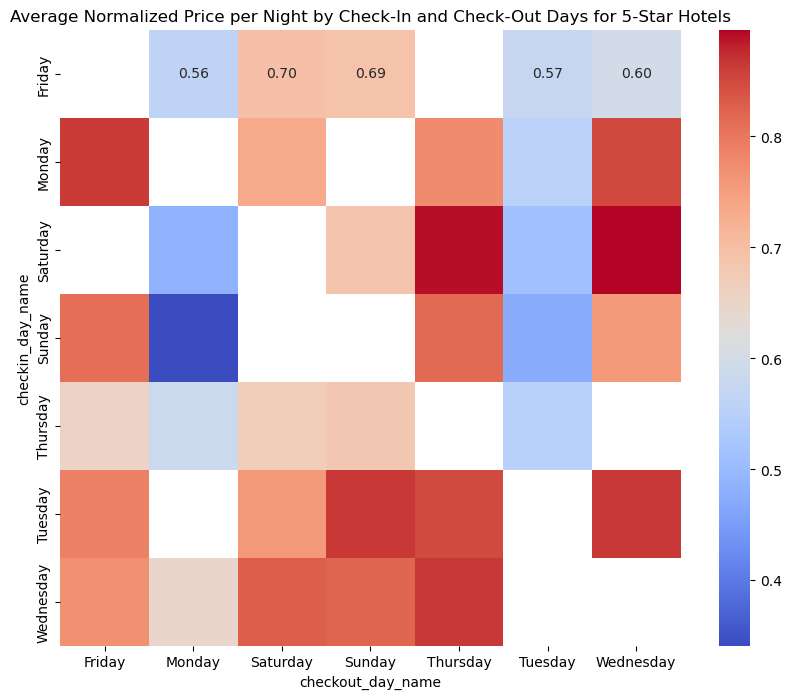

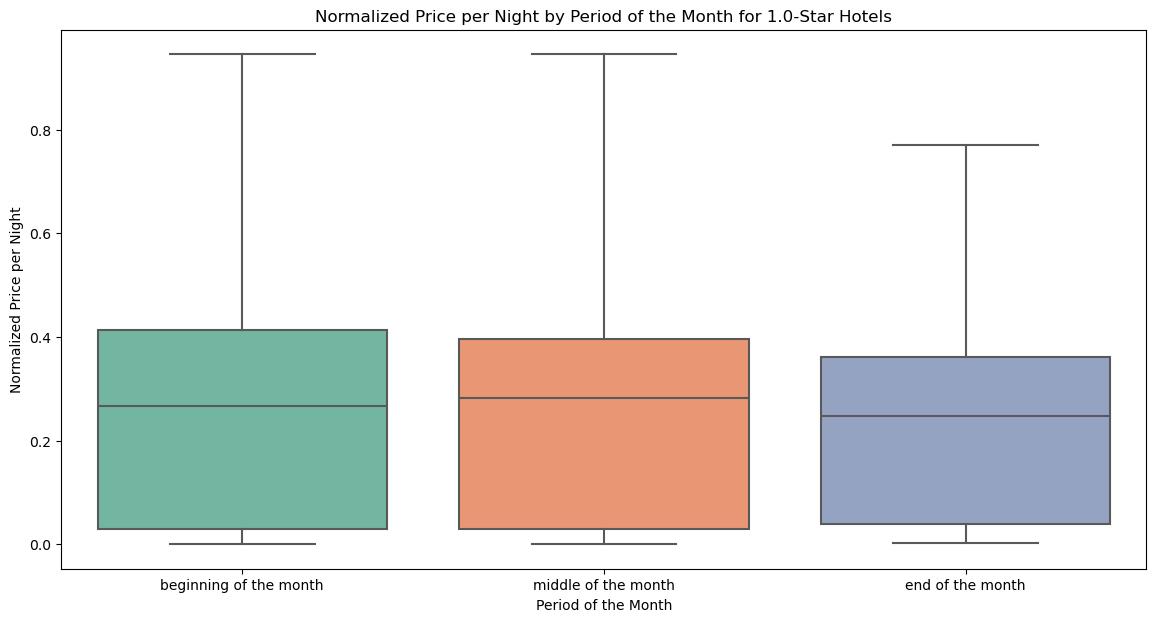

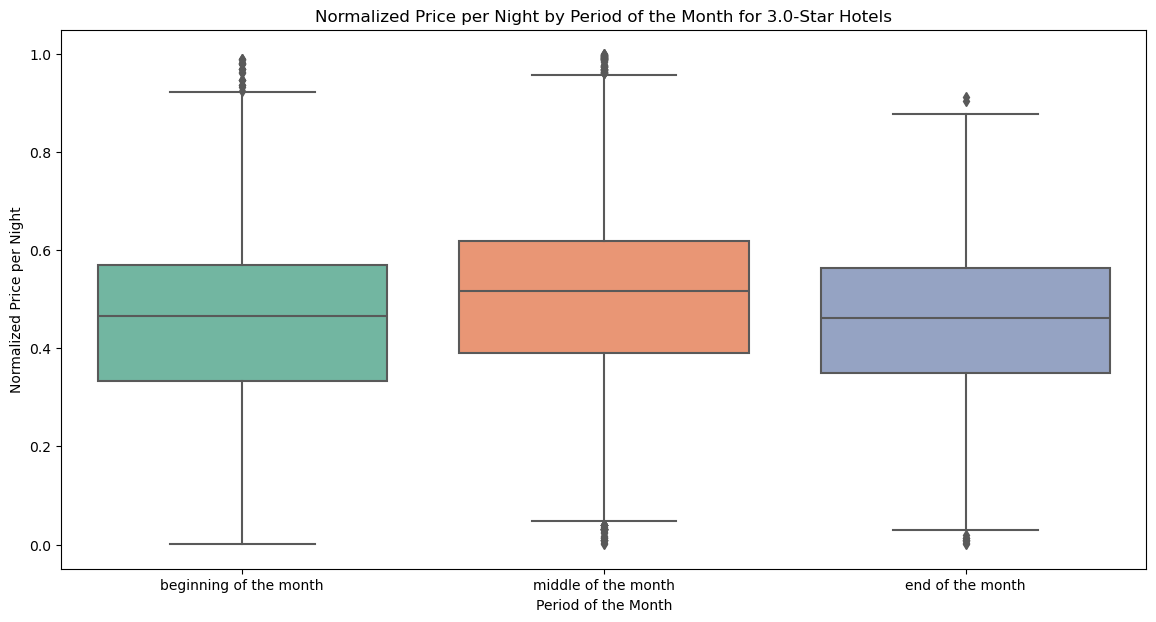

No data available for nan-star hotels.


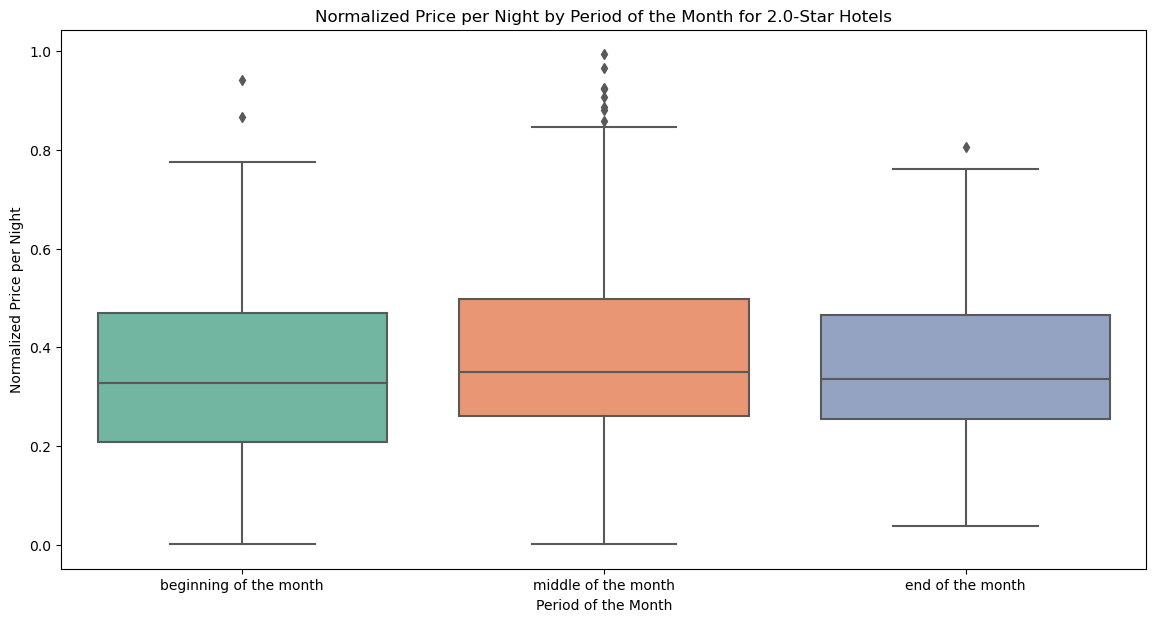

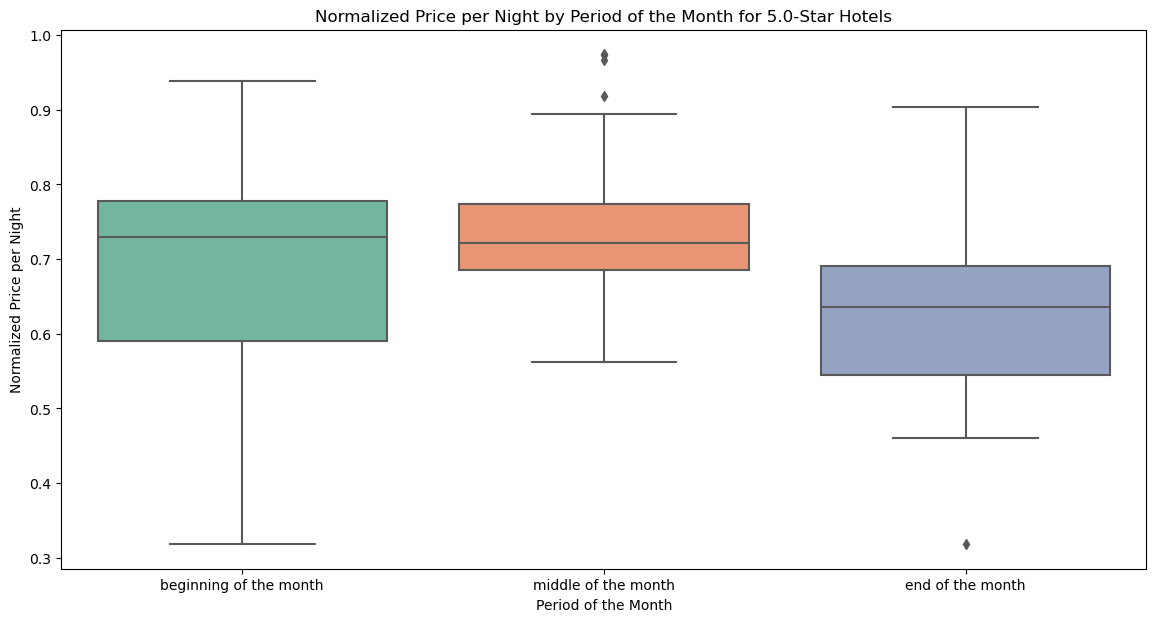

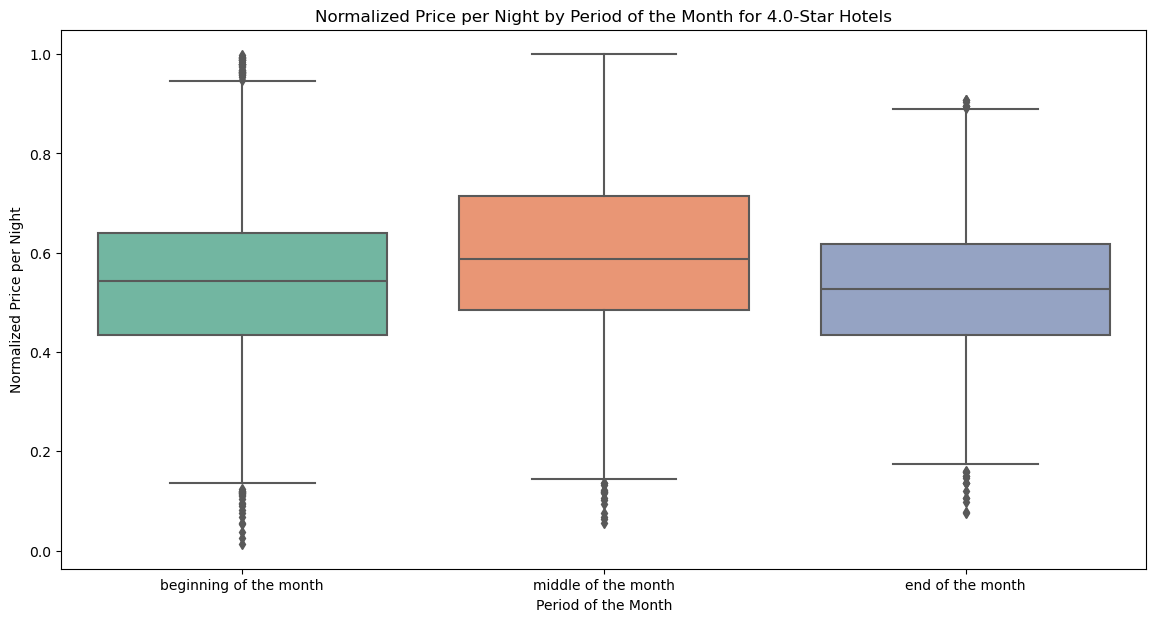

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
file_path = '25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv'
df = pd.read_csv(file_path)

# Identify columns to normalize
columns_to_normalize = ['score', 'reviews', 'km_from_center', 'price_per_night']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Verify the normalization
print("Normalized Data:")
print(df[columns_to_normalize].head())

# Display the columns in the dataframe to understand the structure
print(df.columns)

# Assuming the days columns are named with the prefix 'checkin_day_name_' and 'checkout_day_name_'
checkin_day_columns = [
    'checkin_day_name_Sunday', 'checkin_day_name_Monday', 'checkin_day_name_Tuesday', 
    'checkin_day_name_Wednesday', 'checkin_day_name_Thursday', 'checkin_day_name_Friday', 
    'checkin_day_name_Saturday'
]

checkout_day_columns = [
    'checkout_day_name_Sunday', 'checkout_day_name_Monday', 'checkout_day_name_Tuesday', 
    'checkout_day_name_Wednesday', 'checkout_day_name_Thursday', 'checkout_day_name_Friday', 
    'checkout_day_name_Saturday'
]

# Convert the binary day columns back to categorical day names
df['checkin_day_name'] = df[checkin_day_columns].idxmax(axis=1).str.replace('checkin_day_name_', '')
df['checkout_day_name'] = df[checkout_day_columns].idxmax(axis=1).str.replace('checkout_day_name_', '')

# Visualization 1: Histogram of Reviews
plt.figure(figsize=(14, 7))
sns.histplot(df['reviews'], kde=True, bins=30, color='blue')
plt.title('Distribution of Normalized Reviews')
plt.xlabel('Normalized Reviews')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Scatter Plot of Reviews vs. Price per Night
plt.figure(figsize=(14, 7))
sns.scatterplot(x='reviews', y='price_per_night', data=df, hue='star_rating', palette='viridis', alpha=0.3)
plt.title('Normalized Price per Night vs. Normalized Reviews')
plt.xlabel('Normalized Reviews')
plt.ylabel('Normalized Price per Night')
plt.legend(title='Star Rating')
plt.show()

# Visualization 3: Box Plot of Reviews by Check-In and Check-Out Days
plt.figure(figsize=(14, 7))
sns.boxplot(x='checkin_day_name', y='reviews', hue='checkout_day_name', data=df, palette='Set3')
plt.title('Normalized Reviews by Check-In and Check-Out Days')
plt.show()

# Prepare data for heatmaps based on star ratings
star_ratings = [1, 2, 3, 4, 5]
heatmap_data = {}
for star in star_ratings:
    heatmap_data[star] = df[df['star_rating'] == star].pivot_table(index='checkin_day_name', columns='checkout_day_name', values='price_per_night', aggfunc='mean')

# Create heatmaps for each star rating with annotations
for star in star_ratings:
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(heatmap_data[star], annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title(f'Average Normalized Price per Night by Check-In and Check-Out Days for {star}-Star Hotels')
    plt.show()


# Add a new column for period of the month
df['period_of_the_month'] = df[['period_of_the_month_beginning of the month', 'period_of_the_month_end of the month', 'period_of_the_month_middle of the month']].idxmax(axis=1).str.replace('period_of_the_month_', '')

# Visualization 4: Box Plot of Price by Period of the Month and Star Rating
star_ratings = df['star_rating'].unique()

for star in star_ratings:
    # Filter the dataframe for the current star rating
    star_df = df[df['star_rating'] == star]
    
    # Check if the filtered dataframe is empty
    if star_df.empty:
        print(f"No data available for {star}-star hotels.")
        continue
    
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='period_of_the_month', y='price_per_night', data=star_df, palette='Set2')
    plt.title(f'Normalized Price per Night by Period of the Month for {star}-Star Hotels')
    plt.xlabel('Period of the Month')
    plt.ylabel('Normalized Price per Night')
    plt.show()